 ## Recommendation System

>   A recommender system, or a recommendation system (sometimes replacing 'system' with a synonym such as platform or engine), is a subclass of information filtering system that seeks to predict the "rating" or "preference" a user would give to an item. They are primarily used in commercial applications. <br>
Recommender systems are utilized in a variety of areas and are most commonly recognized as playlist generators for video and music services like Netflix, YouTube and Spotify, product recommenders for services such as Amazon, or content recommenders for social media platforms such as Facebook and Twitter. These systems can operate using a single input, like music, or multiple inputs within and across platforms like news, books, and search queries. There are also popular recommender systems for specific topics like restaurants and online dating. Recommender systems have also been developed to explore research articles and experts, collaborators, and financial services. 


In this notebook, I will attempt at implementing a few recommendation algorithms (content based, popularity based and collaborative filtering) and try to build an ensemble of these models to come up with our final recommendation system. With us, we have two datasets.

    The TMDb Dataset
    The Small Dataset: Comprises of 100,000 ratings and 1,300 tag applications applied to 9,000 movies by 700 users.




## Recommender Systems: Types of Filtering Techniques 
>* Demographic Filtering (DF)
>> Generalized recommendations based on and/or popularity genre. The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience. <br>
>> key words = ***popularity genre***

>* Content-based  filtering (CBF) 
>> Content-based  filtering  (CBF) methods are based on a profile of the user‟s preference and  on  a  description of  the  item.  In  this  filtering to describe  the  items,keywords  are  used  and  then  a  user profile is built to indicate the type of item this user likes. <br>
>> key words = ***Based on item***

>* Collaborative  filtering (CF) 
>> Collaborative  filtering (CF) systems  and  computer-based recommendation  are  often related with  the origin of  the system   called   Tapestry.   In   Tapestry,   with   arbitrary   text comments users  were  able  to  annotate  documents  and  other users based on the comments of other users could then query. One  of  the  main  attribute  of  this  system  is  that  it  allowed recommendations to be  generated based on a  combination  of ideas of the input from many other users. Rather than filtering items  based  on  content,  making  recommendations  based  on the  opinions  of like-minded  users  has  become  popularly known as collaborative filtering. <br>
>> key words = ***similar interests***



Reference

> [Recommender Systems Techniques](recommender-systems-types-of-filtering-techniques-IJERTV3IS110197.pdf) <br>
> [Kaggle Source](https://www.kaggle.com/ibtesama/getting-started-with-a-movie-recommendation-system)<br>
> [TMDb Dataset](https://www.kaggle.com/tmdb/tmdb-movie-metadata) <br>
> [Small dataset](https://www.kaggle.com/rounakbanik/the-movies-dataset?select=links_small.csv)





In [ ]:
#load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

movies = pd.read_csv('/content/drive/My Drive/Project/Data Science/Movie Recommendation/The Movie Database (TMDb)/tmdb_5000_movies.csv')
credits = pd.read_csv('/content/drive/My Drive/Project/Data Science/Movie Recommendation/The Movie Database (TMDb)/tmdb_5000_credits.csv')


In [ ]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [ ]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


Let's join the two dataset on the 'id' column

In [ ]:
credits.columns = ['id','tittle','cast','crew']
movies= movies.merge(credits,on='id')
movies.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


### Demographic Filtering (DF)

as we can see, DF will recommend movies based on and/or popularity genre.

So, we can just recommend movie based on 


*   The Highest Popularity
*   The Highest Vote or
*   The Most Expensive



In [ ]:
DF_RS = []

#### The Highest Popularity

Text(0.5, 1.0, 'Popular Movies')

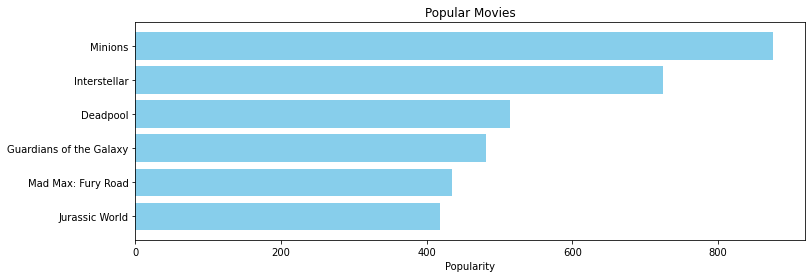

In [ ]:
pop = movies.sort_values('popularity', ascending=False)


DF_RS.append(list(pop['title'][:6]))
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

#### The Highest Vote 

The Highest Average Vote

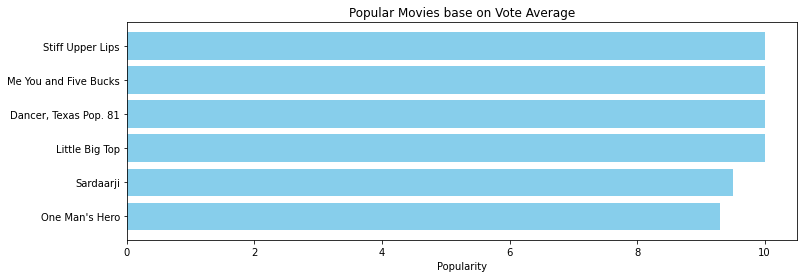

In [ ]:

vote_average = movies.sort_values('vote_average', ascending=False)
DF_RS.append(list(vote_average['title'][:6]))

plt.figure(figsize=(12,4))
plt.barh(vote_average['title'].head(6),vote_average['vote_average'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies base on Vote Average")
plt.show()

##### The Most Vote

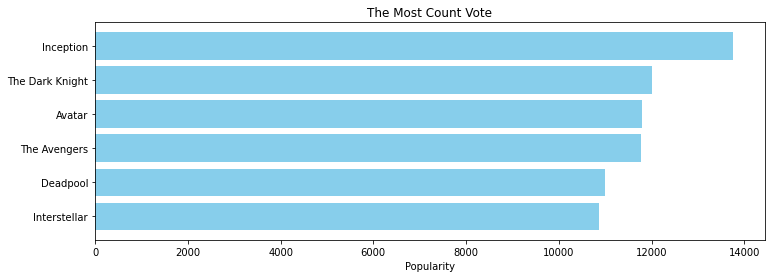

In [ ]:
pop = movies.sort_values('vote_count', ascending=False)
DF_RS.append(list(pop['title'][:6]))

plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['vote_count'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("The Most Count Vote")
plt.show()


#### Weighted Rating (WR)

we can use another ways, such as recommend based on WR. <br>
We can use the average ratings of the movie as the score but using this won't be fair enough since a movie with 8.9 average rating and only 3 votes cannot be considered better than the movie with 7.8 as as average rating but 40 votes. So, I'll be using IMDB's weighted rating (wr) which is given as : -

![alt text](https://image.ibb.co/jYWZp9/wr.png)

where,

    v is the number of votes for the movie;
    m is the minimum votes required to be listed in the chart;
    R is the average rating of the movie; And
    C is the mean vote across the whole report

We already have v(vote_count) and R (vote_average) and C can be calculated as

In [ ]:
C = movies['vote_average'].mean()
m = movies['vote_count'].quantile(0.9)

C, m

(6.092171559442011, 1838.4000000000015)

In [ ]:
q_movies = movies.copy().loc[movies['vote_count'] >= m]
q_movies.shape

(481, 23)

In [ ]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [ ]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [ ]:
movies['score'] = q_movies['score']

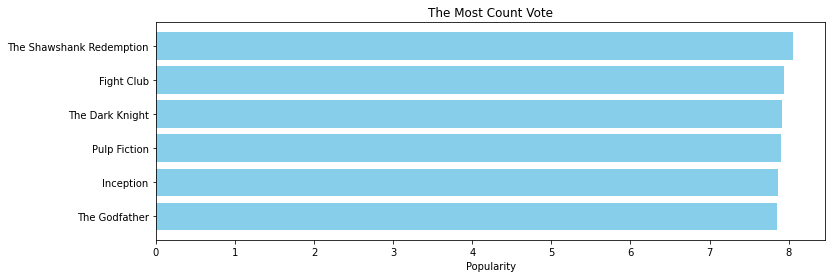

In [ ]:
# Finally, let's sort the DataFrame based on the score feature and output the title, vote count, vote average and weighted rating or score of the top 10 movies.
pop = q_movies.sort_values('score', ascending=False)
DF_RS.append(list(pop['title'][:6]))

plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['score'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("The Most Count Vote")
plt.show()


In [ ]:
df_DF_RS = pd.DataFrame(np.array(DF_RS).transpose(), columns=['Popularity', 'Average Vote', 'Count Vote', 'Weighted Rating'], index=None)
df_DF_RS

,Popularity,Average Vote,Count Vote,Weighted Rating
0,Minions,Stiff Upper Lips,Inception,The Shawshank Redemption
1,Interstellar,Me You and Five Bucks,The Dark Knight,Fight Club
2,Deadpool,"Dancer, Texas Pop. 81",Avatar,The Dark Knight
3,Guardians of the Galaxy,Little Big Top,The Avengers,Pulp Fiction
4,Mad Max: Fury Road,Sardaarji,Deadpool,Inception
5,Jurassic World,One Man's Hero,Interstellar,The Godfather




Now something to keep in mind is that these demographic recommender provide a general chart of recommended movies to all the users. They are not sensitive to the interests and tastes of a particular user. This is when we move on to a more refined system- Content Based Filtering.


### Content Based Filtering
Content Based Filtering Illustration

![alt text](https://miro.medium.com/max/448/1*BME1JjIlBEAI9BV5pOO5Mg.png)






#### Story based Recommender
We will compute pairwise similarity scores for all movies based on their plot descriptions and recommend movies based on that similarity score. The plot description is given in the overview feature of our dataset. Let's take a look at the data. ..

In [ ]:
movies['overview'].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

we'll compute Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each overview. this method same as text processing process. TF-IDF's goal is to change the word vector of each general description.

Now if you are wondering what is term frequency , it is the relative frequency of a word in a document and is given as (term instances/total instances). Inverse Document Frequency is the relative count of documents containing the term is given as log(number of documents/documents with term) The overall importance of each word to the documents in which they appear is equal to TF * IDF

This will give you a matrix where each column represents a word in the overview vocabulary (all the words that appear in at least one document) and each row represents a movie, as before.This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

Fortunately, scikit-learn gives you a built-in TfIdfVectorizer class that produces the TF-IDF matrix in a couple of lines. That's great, isn't it?

In [ ]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
movies['overview'] = movies['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(movies['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 20978)

from tfidf_matrix shape we know that, there are over 20.000 different words were used to describe all of 4803 movies in TMDb Dataset.

from this value, we can compute similarity score. there are several method that can be used for similarity such as:
- The Eucledian
- The Pearson
- The Cosine similarity

Different scores work well in different scenarios and it is often a good idea to experiment with different metrics.

We will be using the cosine similarity to calculate a numeric quantity that denotes the similarity between two movies. We use the cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate. Mathematically, it is defined as follows:

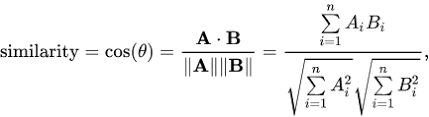



Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. Therefore, we will use sklearn's linear_kernel() instead of cosine_similarities() since it is faster.


In [ ]:
dense = tfidf_matrix.todense()
denselist = dense.tolist()
# df = pd.DataFrame(denselist, columns=['overview'])
# s = pd.Series(df.loc['Adam'])
# s[s > 0].sort_values(ascending=False)[:10]

In [ ]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(movies.index, index= movies['title']).drop_duplicates()
indices

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [ ]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return movies['title'].iloc[movie_indices]

In [ ]:
get_recommendations('The Dark Knight Rises') 

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

In [ ]:
get_recommendations('The Avengers')

7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: title, dtype: object

In [ ]:
get_recommendations('Spectre')

1343    Never Say Never Again
4071    From Russia with Love
3162              Thunderball
1717               Safe Haven
11          Quantum of Solace
4339                   Dr. No
29                    Skyfall
1880              Dance Flick
3336     Diamonds Are Forever
1743                Octopussy
Name: title, dtype: object

#### Credits, Genres and Keywords Based Recommende

this section, we are goint to build recommender based on the following metadata : the top actors, the director, related genres and the movie plot keywords.

From the cast, crew and keywords features, we need to extract the three most important actors, the director and the keywords associated with that movie. Right now, our data is present in the form of "stringified" lists , we need to convert it into a safe and usable structure

In [ ]:
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']

for feature in features:
  movies[feature] = movies[feature].apply(literal_eval)

literal_eval 
> Safely evaluate an expression node or a Unicode or Latin-1 encoded string containing a Python expression. The string or node provided may only consist of the following Python literal structures: strings, numbers, tuples, lists, dicts, booleans, and None. <br>
This can be used for safely evaluating strings containing Python expressions from untrusted sources without the need to parse the values oneself.

In [ ]:
### literal_eval example
string_value = "{'a':2, 'b':4}"
print("before type : ", type(string_value))
dict_value = literal_eval(string_value)
print("after type : ", type(dict_value))

before type :  <class 'str'>
after type :  <class 'dict'>


In [ ]:
 movies[features]

,cast,crew,keywords,genres
0,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...","[{'id': 1463, 'name': 'culture clash'}, {'id':...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
1,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de...","[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
3,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...","[{'id': 849, 'name': 'dc comics'}, {'id': 853,...","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam..."
4,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
...,...,...,...,...
4798,"[{'cast_id': 1, 'character': 'El Mariachi', 'c...","[{'credit_id': '52fe44eec3a36847f80b280b', 'de...","[{'id': 5616, 'name': 'united states–mexico ba...","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam..."
4799,"[{'cast_id': 1, 'character': 'Buzzy', 'credit_...","[{'credit_id': '52fe487dc3a368484e0fb013', 'de...",[],"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '..."
4800,"[{'cast_id': 8, 'character': 'Oliver O’Toole',...","[{'credit_id': '52fe4df3c3a36847f8275ecf', 'de...","[{'id': 248, 'name': 'date'}, {'id': 699, 'nam...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4801,"[{'cast_id': 3, 'character': 'Sam', 'credit_id...","[{'credit_id': '52fe4ad9c3a368484e16a36b', 'de...",[],[]


In [ ]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [ ]:
# Define new director, cast, genres and keywords features that are in a suitable form.
movies['director'] = movies['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    movies[feature] = movies[feature].apply(get_list)


,cast,keywords,genres
0,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[spy, based on novel, secret agent]","[Action, Adventure, Crime]"
3,"[Christian Bale, Michael Caine, Gary Oldman]","[dc comics, crime fighter, terrorist]","[Action, Crime, Drama]"
4,"[Taylor Kitsch, Lynn Collins, Samantha Morton]","[based on novel, mars, medallion]","[Action, Adventure, Science Fiction]"
...,...,...,...
4798,"[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...","[united states–mexico barrier, legs, arms]","[Action, Crime, Thriller]"
4799,"[Edward Burns, Kerry Bishé, Marsha Dietlein]",[],"[Comedy, Romance]"
4800,"[Eric Mabius, Kristin Booth, Crystal Lowe]","[date, love at first sight, narration]","[Comedy, Drama, Romance]"
4801,"[Daniel Henney, Eliza Coupe, Bill Paxton]",[],[]


In [ ]:
# Print the new features of the first 3 films
movies[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"




The next step would be to convert the names and keyword instances into lowercase and strip all the spaces between them. This is done so that our vectorizer doesn't count the Johnny of "Johnny Depp" and "Johnny Galecki" as the same.


In [ ]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [ ]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    movies[feature] = movies[feature].apply(clean_data)

We are now in a position to create our "metadata soup", which is a string that contains all the metadata that we want to feed to our vectorizer (namely actors, director and keywords).

In [ ]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
movies['soup'] = movies.apply(create_soup, axis=1)

In [ ]:
movies['soup']

0       cultureclash future spacewar samworthington zo...
1       ocean drugabuse exoticisland johnnydepp orland...
2       spy basedonnovel secretagent danielcraig chris...
3       dccomics crimefighter terrorist christianbale ...
4       basedonnovel mars medallion taylorkitsch lynnc...
                              ...                        
4798    unitedstates–mexicobarrier legs arms carlosgal...
4799     edwardburns kerrybishé marshadietlein edwardb...
4800    date loveatfirstsight narration ericmabius kri...
4801       danielhenney elizacoupe billpaxton danielhsia 
4802    obsession camcorder crush drewbarrymore brianh...
Name: soup, Length: 4803, dtype: object



The next steps are the same as what we did with our plot description based recommender. One important difference is that we use the CountVectorizer() instead of TF-IDF. This is because we do not want to down-weight the presence of an actor/director if he or she has acted or directed in relatively more movies. It doesn't make much intuitive sense.


In [ ]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(movies['soup'])

In [ ]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [ ]:
movies = movies.reset_index()
indices = pd.Series(movies.index, index=movies['title'])

In [ ]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
1196                The Prestige
3073           Romeo Is Bleeding
3326              Black November
1503                      Takers
1986                      Faster
303                     Catwoman
747               Gangster Squad
Name: title, dtype: object

In [ ]:
get_recommendations('The Avengers', cosine_sim2)

7                  Avengers: Age of Ultron
26              Captain America: Civil War
79                              Iron Man 2
169     Captain America: The First Avenger
174                    The Incredible Hulk
85     Captain America: The Winter Soldier
31                              Iron Man 3
33                   X-Men: The Last Stand
68                                Iron Man
94                 Guardians of the Galaxy
Name: title, dtype: object

### Collaborative Filtering

![alt text](https://miro.medium.com/max/400/1*x8gTiprhLs7zflmEn1UjAQ.png)

Content based filtering have severe limitations. it is only capable suggesting just based on similarity to certain movie. That is, it is not capable of capturing tastes and providing recommendations across genres. <br>

also, it doesn't has the personal tastes and biases of a user. Collaborative Filtering is the same as when we want to get movies recommendation from our friend. <br>

Therefore, in this section, we will use a technique called Collaborative Filtering to make recommendations to Movie Watchers. It is basically of two types:-


*   **User based filtering**  - recommend product to user that user's liked. to find this similarity we can use correlation or cosine similarity. 
*   **Item based collaborative filtering** - Instead of measuring the similarity between users, the item-based CF recommends items based on their similarity with the items that the target user rated. Likewise, the similarity can be computed with Pearson Correlation or Cosine Similarity. The major difference is that, with item-based collaborative filtering, we fill in the blank vertically, as oppose to the horizontal manner that user-based CF does.



[suprise](https://surprise.readthedocs.io/en/stable/getting_started.html)

In [ ]:
!pip install scikit-surprise

In [ ]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate

In [ ]:
reader = Reader()
ratings = pd.read_csv('/content/drive/My Drive/Project/Data Science/Movie Recommendation/The Movie Database (TMDb)/ratings_small.csv')
ratings.head()


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [ ]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8951  0.8995  0.8934  0.8919  0.8952  0.8950  0.0025  
MAE (testset)     0.6860  0.6917  0.6902  0.6889  0.6891  0.6892  0.0019  
Fit time          4.98    4.93    5.20    5.15    5.13    5.08    0.11    
Test time         0.16    1.03    0.16    0.17    0.16    0.34    0.35    


{'fit_time': (4.9805426597595215,
  4.92795467376709,
  5.204048156738281,
  5.154184579849243,
  5.13353157043457),
 'test_mae': array([0.68603613, 0.69171776, 0.69016375, 0.68888633, 0.68908449]),
 'test_rmse': array([0.89510295, 0.89945398, 0.89337428, 0.89187645, 0.89522031]),
 'test_time': (0.1608409881591797,
  1.0309398174285889,
  0.15794992446899414,
  0.17155098915100098,
  0.16162848472595215)}



We get a mean Root Mean Sqaure Error of 0.89 approx which is more than good enough for our case. Let us now train on our dataset and arrive at predictions.


In [ ]:
trainset = data.build_full_trainset()
svd.fit(trainset)



Let us pick user with user Id 1 and check the ratings she/he has given.


In [ ]:
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [ ]:
svd.predict(1, 302, 3)

Prediction(uid=1, iid=302, r_ui=3, est=2.6690581628308165, details={'was_impossible': False})



For movie with ID 302, we get an estimated prediction of 2.618. One startling feature of this recommender system is that it doesn't care what the movie is (or what it contains). It works purely on the basis of an assigned movie ID and tries to predict ratings based on how the other users have predicted the movie.


### Hybrid Recommender
Now, we have finished try 3 base recommender, how about we try to hybrid it.



In this section, I will try to build a simple hybrid recommender that brings together techniques we have implemented in the content based and collaborative filter based engines. This is how it will work:

    Input: User ID and the Title of a Movie
    Output: Similar movies sorted on the basis of expected ratings by that particular user.


[Reference](https://www.kaggle.com/rounakbanik/movie-recommender-systems?select=links_small.csv)

In [ ]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [ ]:
id_map = pd.read_csv('/content/drive/My Drive/Project/Data Science/Movie Recommendation/The Movie Database (TMDb)/links_small.csv')
id_map.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [ ]:
links_small = pd.read_csv('/content/drive/My Drive/Project/Data Science/Movie Recommendation/The Movie Database (TMDb)/links_small.csv')
links_small = links_small[links_small['tmdbId'].notnull()]['tmdbId'].astype('int')

In [ ]:
md = movies.copy()

In [ ]:
md['id'] = md['id'].astype('int')
smd = md[md['id'].isin(links_small)]
smd.shape

(3404, 27)

In [ ]:
smd['year'] = pd.to_datetime(smd['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
id_map = pd.read_csv('/content/drive/My Drive/Project/Data Science/Movie Recommendation/The Movie Database (TMDb)/links_small.csv')[['movieId', 'tmdbId']]
id_map['tmdbId'] = id_map['tmdbId'].apply(convert_int)
id_map.columns = ['movieId', 'id']
id_map = id_map.merge(smd[['title', 'id']], on='id').set_index('title')
#id_map = id_map.set_index('tmdbId')



In [ ]:
indices_map = id_map.set_index('id')

In [ ]:
id_map

,movieId,id
title,,
Toy Story,1,862.0
GoldenEye,10,710.0
The American President,11,9087.0
Nixon,14,10858.0
Cutthroat Island,15,1408.0
...,...,...
The Maid's Room,160440,278348.0
The Legend of Tarzan,160563,258489.0
The Purge: Election Year,160565,316727.0


In [ ]:
id_map.loc['Avatar']

movieId    72998.0
id         19995.0
Name: Avatar, dtype: float64

In [ ]:
smd.shape[0]

3404

In [ ]:
def hybrid(userId, title):
  # get index from title
  idx = indices[title]

  #get id from title
  tmdbId = id_map.loc[title]['id']
  #print(idx)

  #get movieId from title
  movie_id = id_map.loc[title]['movieId']

  #find similarity with cosine_sim that we have builded, 
  sim_scores = list(enumerate(cosine_sim[int(idx)]))

  #get 10 best similarity score 
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
  sim_scores = sim_scores[1:26]

  #find index from movies that have high similarity score, (Content based filtering)
  movie_indices = [i[0] for i in sim_scores if i[0] <= smd.shape[0]]
  
  #get ['title', 'vote_count', 'vote_average', 'year', 'id'] value from movie_indices
  movies = smd.iloc[movie_indices][['title', 'vote_count', 'vote_average', 'year', 'id']]

  # use SVD (Collaborative Filtering)
  movies['est'] = movies['id'].apply(lambda x: svd.predict(userId, indices_map.loc[x]['movieId']).est)
  
  #sort best value 
  movies = movies.sort_values('est', ascending=False)
  return movies.head(10)

In [ ]:
hybrid(1, 'Avatar')

,title,vote_count,vote_average,year,id,est
3624,Moon,1794,7.6,2009,17431,3.232870
3987,Young Frankenstein,854,7.7,1974,3034,3.090849
1790,"O Brother, Where Art Thou?",1112,7.3,2000,134,3.062238
3812,Network,381,7.7,1976,10774,3.025912
2495,Trance,956,6.5,2013,68727,2.895590
324,The Road to El Dorado,858,7.0,2000,10501,2.877150
1108,Pinocchio,1355,6.9,1940,10895,2.814267
1313,The Ninth Gate,756,6.3,1999,622,2.772744
1466,Unfinished Business,320,5.0,2015,239573,2.701091
1383,Radio,141,6.8,2003,13920,2.681756


In [ ]:
hybrid(50, 'Avatar')

,title,vote_count,vote_average,year,id,est
3987,Young Frankenstein,854,7.7,1974,3034,4.065449
3812,Network,381,7.7,1976,10774,3.971741
3624,Moon,1794,7.6,2009,17431,3.943572
1790,"O Brother, Where Art Thou?",1112,7.3,2000,134,3.863065
2495,Trance,956,6.5,2013,68727,3.513127
1108,Pinocchio,1355,6.9,1940,10895,3.486177
559,The Majestic,188,6.6,2001,11086,3.471122
1313,The Ninth Gate,756,6.3,1999,622,3.443400
1383,Radio,141,6.8,2003,13920,3.334802
3460,Escape from New York,703,6.9,1981,1103,3.272071


as we can see, we got different results even though the recommended movies title is the same. for different users.

## Conclussion
n this notebook, I have built 4 different recommendation engines based on different ideas and algorithms. They are as follows:
1.   **Demographic Filtering** : This system used overall TMDB Vote Count and Vote Averages to build Top Movies Charts, in general and for a specific genre. The IMDB Weighted Rating System was used to calculate ratings on which the sorting was finally performed.
2.  **Content Based Recommender**: We built two content based engines; one that took movie overview and taglines as input and the other which took metadata such as cast, crew, genre and keywords to come up with predictions. We also deviced a simple filter to give greater preference to movies with more votes and higher ratings.
3.    **Collaborative Filtering**: We used the powerful Surprise Library to build a collaborative filter based on single value decomposition. The RMSE obtained was less than 1 and the engine gave estimated ratings for a given user and movie.
4.    **Hybrid Engine**: We brought together ideas from content and collaborative filterting to build an engine that gave movie suggestions to a particular user based on the estimated ratings that it had internally calculated for that user.
